# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units='metric'
base_url=f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | serenje
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | venado
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | karkkila
Processing Record 13 of Set 1 | basoko
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | wukari
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | kathmandu
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | afaahiti
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | sao vicente
Processing

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.59,99,100,1.47,GS,1686422346
1,port-aux-francais,-49.3500,70.2167,3.65,57,100,13.14,TF,1686422346
2,serenje,-13.2325,30.2352,15.96,49,0,2.37,ZM,1686422347
3,port mathurin,-19.6833,63.4167,24.69,73,42,10.62,MU,1686422347
4,margaret river,-33.9500,115.0667,13.13,69,100,8.83,AU,1686422347


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.59,99,100,1.47,GS,1686422346
1,port-aux-francais,-49.3500,70.2167,3.65,57,100,13.14,TF,1686422346
2,serenje,-13.2325,30.2352,15.96,49,0,2.37,ZM,1686422347
3,port mathurin,-19.6833,63.4167,24.69,73,42,10.62,MU,1686422347
4,margaret river,-33.9500,115.0667,13.13,69,100,8.83,AU,1686422347


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

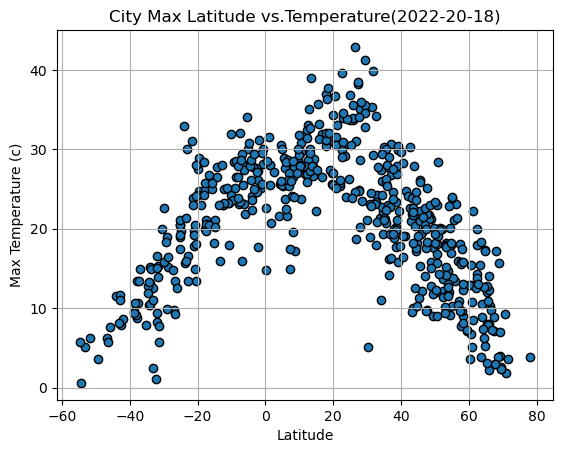

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs.Temperature(2022-20-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

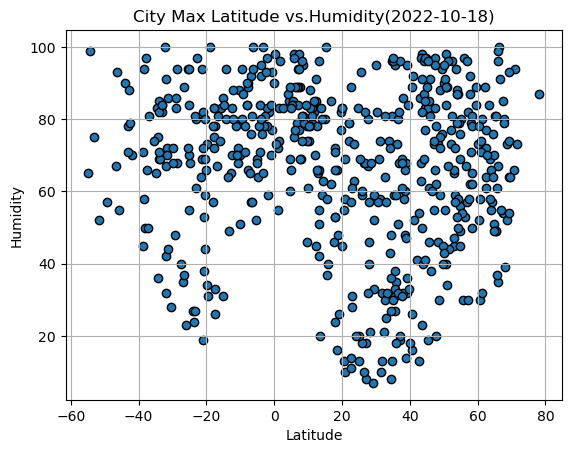

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs.Humidity(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

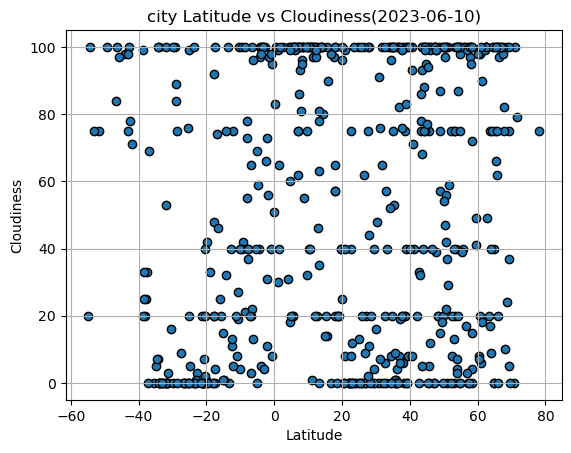

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title("city Latitude vs Cloudiness(2023-06-10)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")
 
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

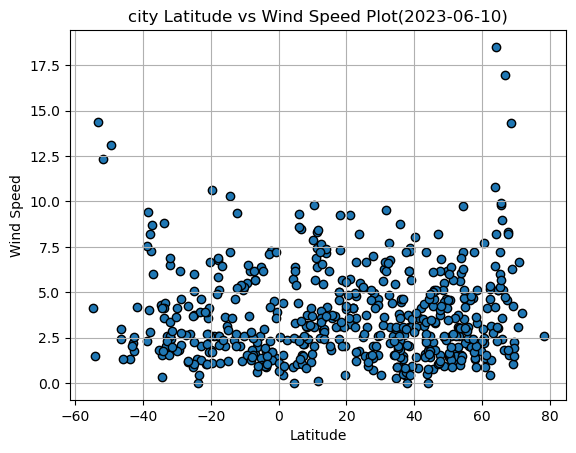

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title("city Latitude vs Wind Speed Plot(2023-06-10)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regression_values, "r-")
    
    
    print(f"The r-value is : {rvalue ** 2}")
    return line_eq

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,venado,22.9333,-101.0833,30.44,28,0,1.22,MX,1686422348
7,stanley,54.8680,-1.6985,18.01,69,0,4.63,GB,1686421868
8,iqaluit,63.7506,-68.5145,3.85,69,75,10.80,CA,1686422348
11,karkkila,60.5342,24.2098,12.87,52,8,2.50,FI,1686422349
12,basoko,1.2391,23.6160,25.53,72,99,0.45,CD,1686422349


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.59,99,100,1.47,GS,1686422346
1,port-aux-francais,-49.3500,70.2167,3.65,57,100,13.14,TF,1686422346
2,serenje,-13.2325,30.2352,15.96,49,0,2.37,ZM,1686422347
3,port mathurin,-19.6833,63.4167,24.69,73,42,10.62,MU,1686422347
4,margaret river,-33.9500,115.0667,13.13,69,100,8.83,AU,1686422347


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.5473441483783805


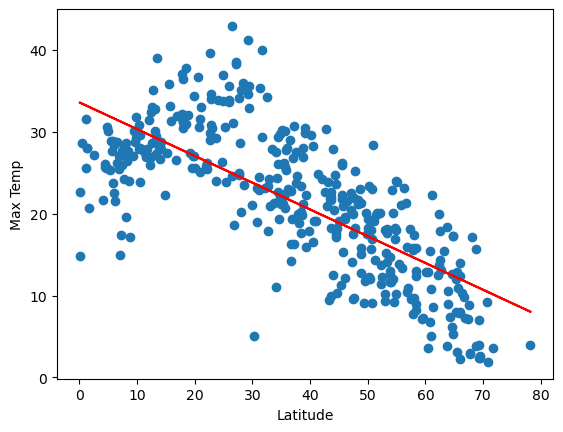

In [25]:
# Linear regression on Northern Hemisphere
regress_temp_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_temp_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(regress_temp_northern_hemi, (5, -30), fontsize=15, color="red")
plt.show()

The r-value is : 0.7132708508083333


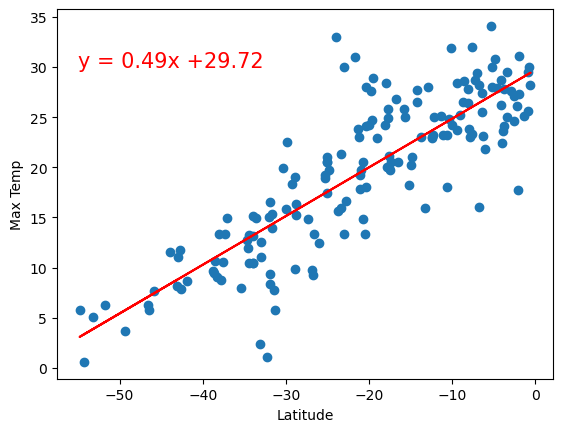

In [26]:
# Linear regression on Southern Hemisphere
regress_temp_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_temp_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(regress_temp_southern_hemi, (-55, 30), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.0005839292444557245


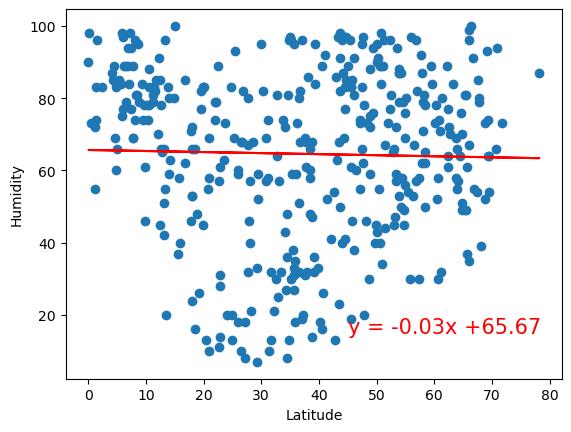

In [27]:
# Northern Hemisphere
regression_humidity_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regression_humidity_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(regression_humidity_northern_hemi, (45, 15), fontsize=15, color="red")
plt.show()

The r-value is : 0.024586469861490913


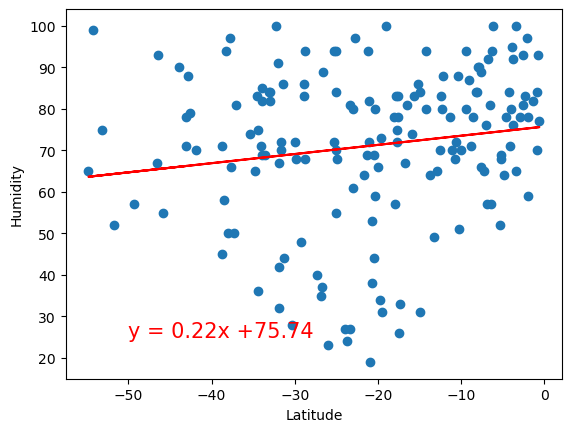

In [28]:
# Southern Hemisphere
regression_humidity_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regression_humidity_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(regression_humidity_southern_hemi, (-50, 25), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.0021652135264672774


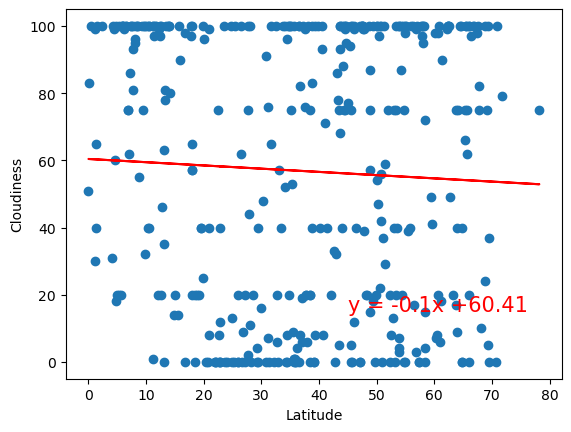

In [29]:
# Northern Hemisphere
regression_cloud_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regression_cloud_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(regression_cloud_northern_hemi, (45, 15), fontsize=15, color="red")
plt.show()

The r-value is : 0.0013482971160475538


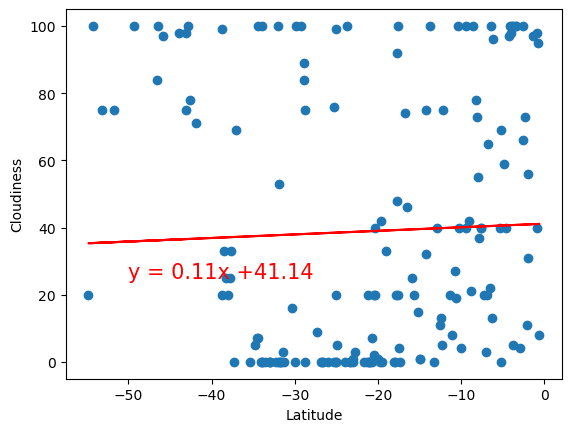

In [30]:
# Southern Hemisphere
regression_cloud_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regression_cloud_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(regression_cloud_southern_hemi, (-50, 25), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.0052124366982053884


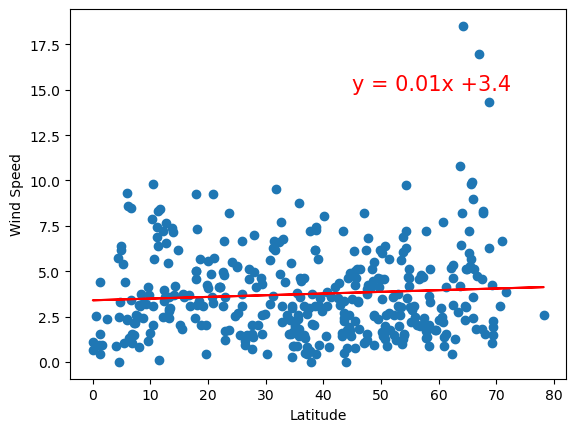

In [31]:
# Northern Hemisphere
regression_wind_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regression_wind_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(regression_wind_northern_hemi, (45, 15), fontsize=15, color="red")
plt.show()

The r-value is : 0.03296150545339477


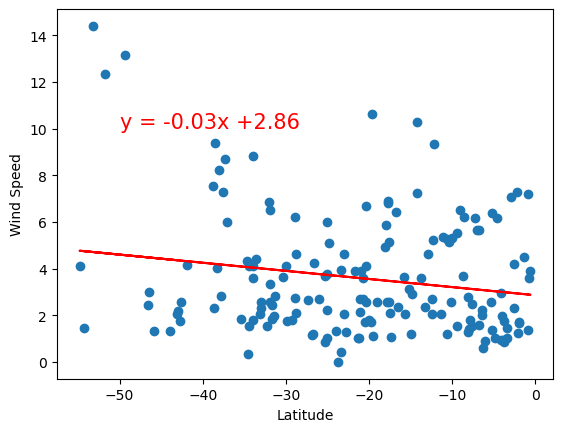

In [32]:
# Southern Hemisphere
regression_wind_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regression_wind_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(regression_wind_southern_hemi, (-50, 10), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE